## Importing libraries and laoding dataset using Pandas

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv("/content/Salary_Data (1).csv")
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


## Summarization of the values in the dataset

In [7]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [8]:
df.shape

(30, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [10]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Exploring the data scatter

array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

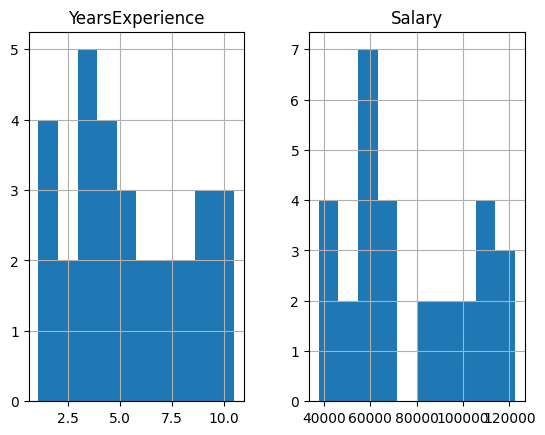

In [11]:
df.hist()

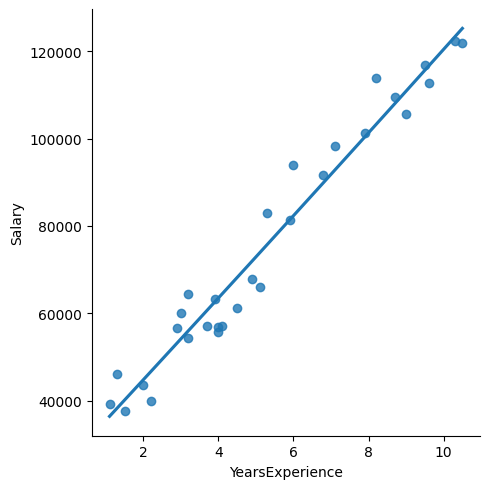

In [12]:
sns.lmplot(x ="YearsExperience", y ="Salary", data = df, order = 2, ci = None)

## Applying linear regression using sklearn library

In [13]:
X = np.array(df['YearsExperience']).reshape(-1, 1)
y = np.array(df['Salary']).reshape(-1, 1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [15]:
regr = LinearRegression()

regr.fit(X_train, y_train)

print(regr.score(X_test, y_test))

0.9426094839145919


## Visualizing the results with the help of a graph

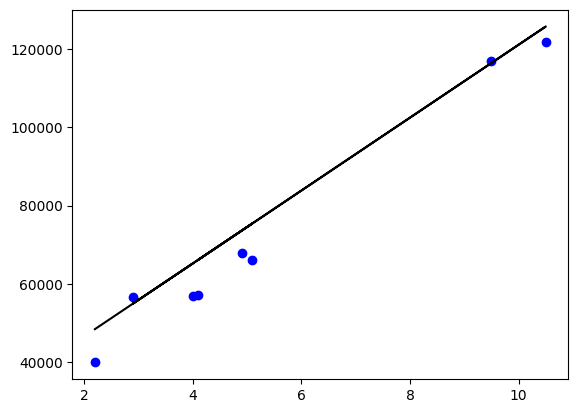

In [16]:
y_pred = regr.predict(X_test)

plt.scatter(X_test, y_test, color ='b')

plt.plot(X_test, y_pred, color ='k')

plt.show()

## R Implementation

In [1]:
library(ggplot2)
library(dplyr)
library(broom)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
csv_file_path <- "/content/Salary_Data (1).csv"
my_data <- read.csv(csv_file_path)
str(my_data)

'data.frame':	30 obs. of  2 variables:
 $ YearsExperience: num  1.1 1.3 1.5 2 2.2 2.9 3 3.2 3.2 3.7 ...
 $ Salary         : int  39343 46205 37731 43525 39891 56642 60150 54445 64445 57189 ...


In [4]:
my_data$X <- NULL

In [5]:
str(my_data)

'data.frame':	30 obs. of  2 variables:
 $ YearsExperience: num  1.1 1.3 1.5 2 2.2 2.9 3 3.2 3.2 3.7 ...
 $ Salary         : int  39343 46205 37731 43525 39891 56642 60150 54445 64445 57189 ...


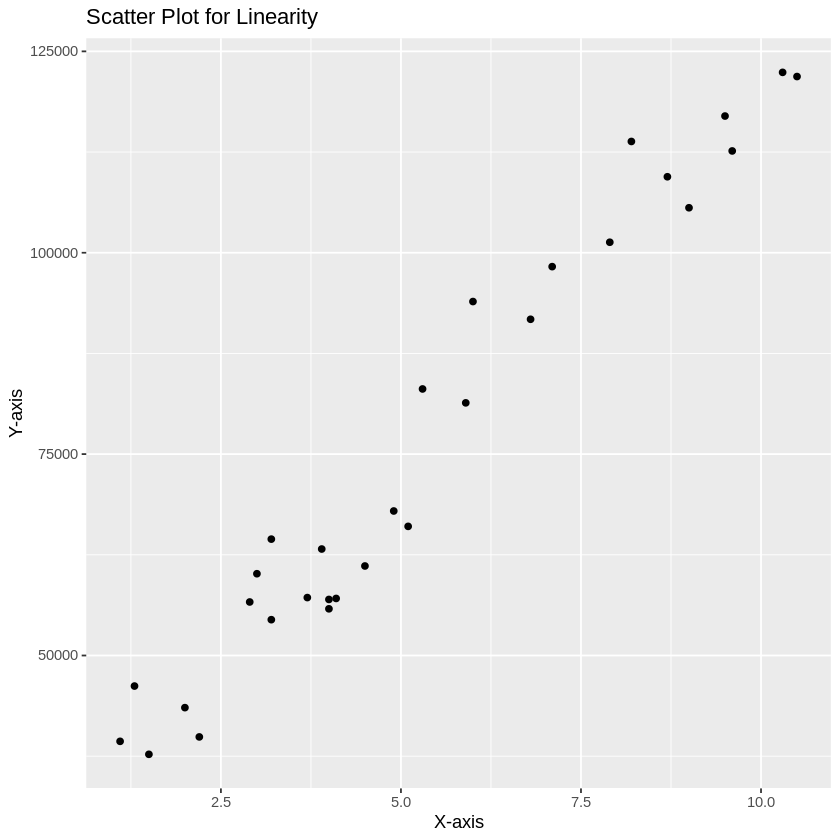

In [6]:
ggplot(my_data, aes(x = YearsExperience, y = Salary)) +
  geom_point() +
  labs(title = "Scatter Plot for Linearity", x = "X-axis", y = "Y-axis")

In [7]:
model <- lm(Salary ~ YearsExperience, data = my_data)
#summary of the model
summary(model)


Call:
lm(formula = Salary ~ YearsExperience, data = my_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7958.0 -4088.5  -459.9  3372.6 11448.0 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      25792.2     2273.1   11.35 5.51e-12 ***
YearsExperience   9450.0      378.8   24.95  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5788 on 28 degrees of freedom
Multiple R-squared:  0.957,	Adjusted R-squared:  0.9554 
F-statistic: 622.5 on 1 and 28 DF,  p-value: < 2.2e-16


In [8]:
new_data <- data.frame(YearsExperience = c(8, 9, 10))
predicted_salaries <- predict(model, newdata = new_data)
print(predicted_salaries)

       1        2        3 
101391.9 110841.9 120291.8 


`geom_smooth()` using formula = 'y ~ x'


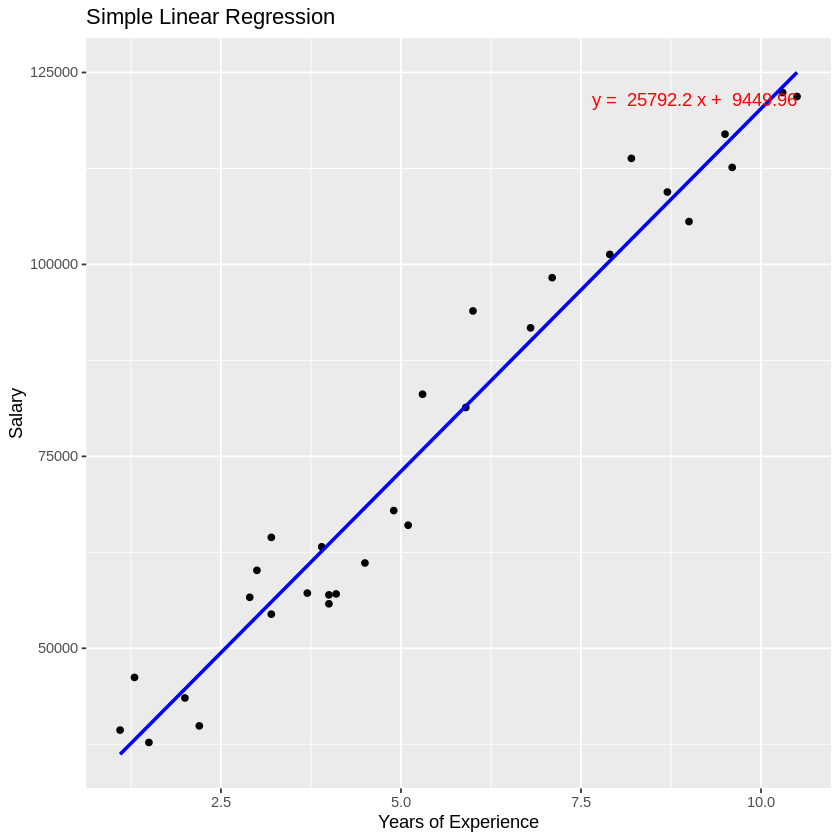

In [9]:
ggplot(my_data, aes(x = YearsExperience, y = Salary)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Simple Linear Regression",
       x = "Years of Experience",
       y = "Salary") +
  annotate("text", x = max(my_data$YearsExperience), y = max(my_data$Salary),
           label = paste("y = ", round(coef(model)[1], 2), "x + ", round(coef(model)[2], 2)),
           hjust = 1, vjust = 1, col = "red")

## Conclusion :


1.   Understood the concept of Simple Linear Regression.
2.   Explored the packages in Python and R.
3.   Performed Simple Linear Regression using the Libraries in Python and R.




